In [ ]:
# 参考文献
# - https://zenn.dev/megane_otoko/articles/042_text_mining
# - https://colab.research.google.com/drive/1F6aFlaTXYCsZWsZs7rRDReqE7WpvB8PI?usp=sharing#scrollTo=3QansuaSxMtL

In [6]:
json_url = 'https://crisis.yuiseki.net/api/news?country=%E6%97%A5%E6%9C%AC&category=poverty&limit=100'
json_url

'https://crisis.yuiseki.net/api/news?country=%E6%97%A5%E6%9C%AC&category=poverty&limit=100'

In [7]:
import requests

response_json = []
response = requests.get(json_url)
response_json = response.json()

response_json[0]

{'factConfirmed': False,
 'fakeConfirmed': False,
 'tags': ['poverty', 'support'],
 '_id': '62cf6762d377c1b2292324bd',
 'url': 'https://www.kyoto-np.co.jp/articles/-/834989',
 '__v': 0,
 'category': 'poverty',
 'createdAt': '2022-07-14T00:46:26.139Z',
 'latitude': 35.021041,
 'longitude': 135.7556075,
 'ogDesc': '原油価格や物価の高騰を受け、京都市は生活困窮者を支援する団体が安定的に活動を続けられるよう助成金を交付する。市内に事業所がある社会福祉法人…',
 'ogImage': 'https://kyoto-np.ismcdn.jp/mwimgs/0/2/1200wm/img_025c263eb2c94ecefc8c78443c2d09c0713700.jpg',
 'ogTitle': '京都市、生活困窮者の支援団体に助成金\u30001団体に最大100万円｜社会｜地域のニュース｜京都新聞',
 'ogUrl': 'https://www.kyoto-np.co.jp/articles/-/834989',
 'placeCity': '京都市',
 'placeCountry': '日本',
 'placePref': '京都府',
 'sourceConfirmed': True,
 'sourceName': '京都新聞',
 'sourceType': '新聞/地方紙',
 'title': '京都市、生活困窮者の支援団体に助成金\u30001団体に最大100万円｜社会｜地域のニュース｜京都新聞',
 'updatedAt': '2022-07-14T00:46:26.139Z'}

In [8]:
import pandas as pd
import numpy as np
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import POSKeepFilter

import japanize_matplotlib
import matplotlib.pyplot as plt

import itertools
from collections import Counter
import networkx as nx

# create networked data
# json to DataFrame
df = pd.DataFrame(response_json)
# ogTitleだけを使う
df = df['ogTitle']

token_filters = [
    POSKeepFilter(['名詞'])  # 名詞を抽出
]
analyzer = Analyzer(token_filters=token_filters)

noun_list = list([token.surface for token in analyzer.analyze(df[0])])
pair_list = list(itertools.combinations([n for n in noun_list if len(noun_list) >=2], 2))
cnt_pairs = Counter(pair_list)
tops = sorted(
    cnt_pairs.items(), 
    key=lambda x: x[1], reverse=True
    )[:500]

# 重み付きデータの生成
noun_1 = []
noun_2 = []
frequency = []

# データフレームの作成
for n,f in tops:
    noun_1.append(n[0])    
    noun_2.append(n[1])
    frequency.append(f)

df_G = pd.DataFrame({'前出名詞': noun_1, '後出名詞': noun_2, '出現頻度': frequency})
df_G

# 重み付きデータの設定
weighted_edges = np.array(df_G)

# グラフオブジェクトの生成
G = nx.Graph()

# 重み付きデータの読み込み
G.add_weighted_edges_from(weighted_edges)

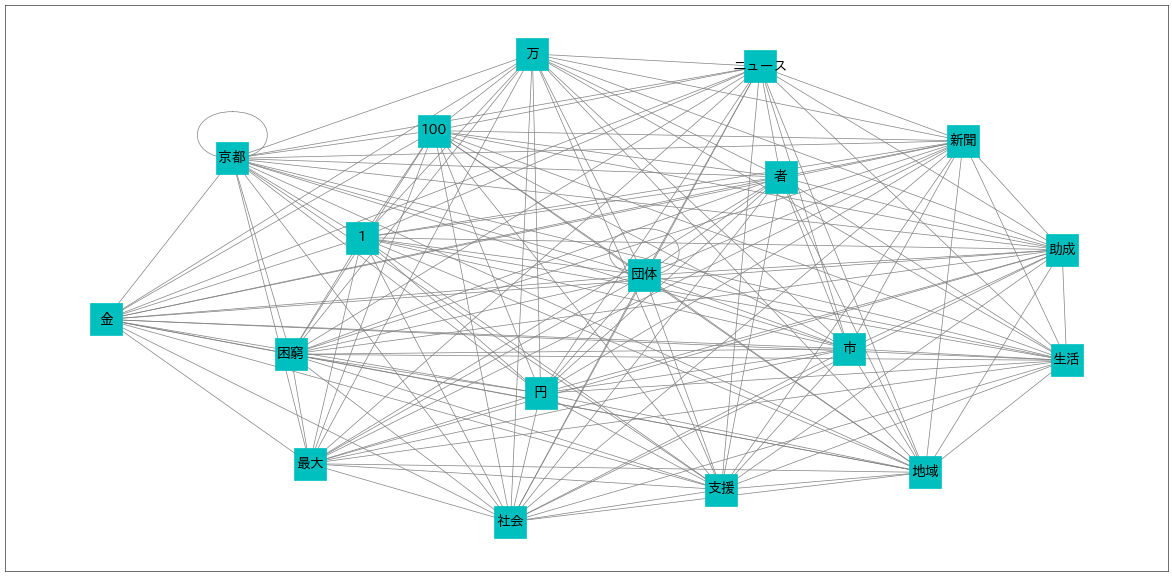

In [9]:
# ネットワーク図の描画
plt.figure(figsize=(30, 15), dpi=50)
nx.draw_networkx(G,
                 node_shape = "s",
                 node_color = "c", 
                 node_size = 2000,
                 edge_color = "gray", 
                 font_family = "IPAexGothic",
                 font_size = 20
);
plt.show()